In [86]:
import logging

logging.basicConfig(filename='25mar.log',level=logging.INFO)

## Problem

Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ans no1

df=pd.read_excel('/content/flight_price.xlsx')
# create a copy of the dataset
df_copy=df
df.shape


(10683, 11)

* the dataset 10683 rows 
* and 11 columns

<Axes: xlabel='Price', ylabel='Count'>

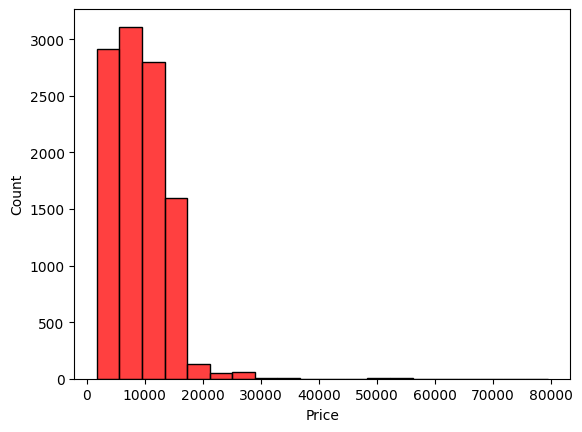

In [88]:
# Ans no2

sns.histplot(data=df,x='Price',bins=20,color='red')

In [89]:
# Ans no3

df['Price'].describe()


count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

* the minimum price is 1759.000000
* the max price is 79512.000000

<Axes: xlabel='Airline', ylabel='Price'>

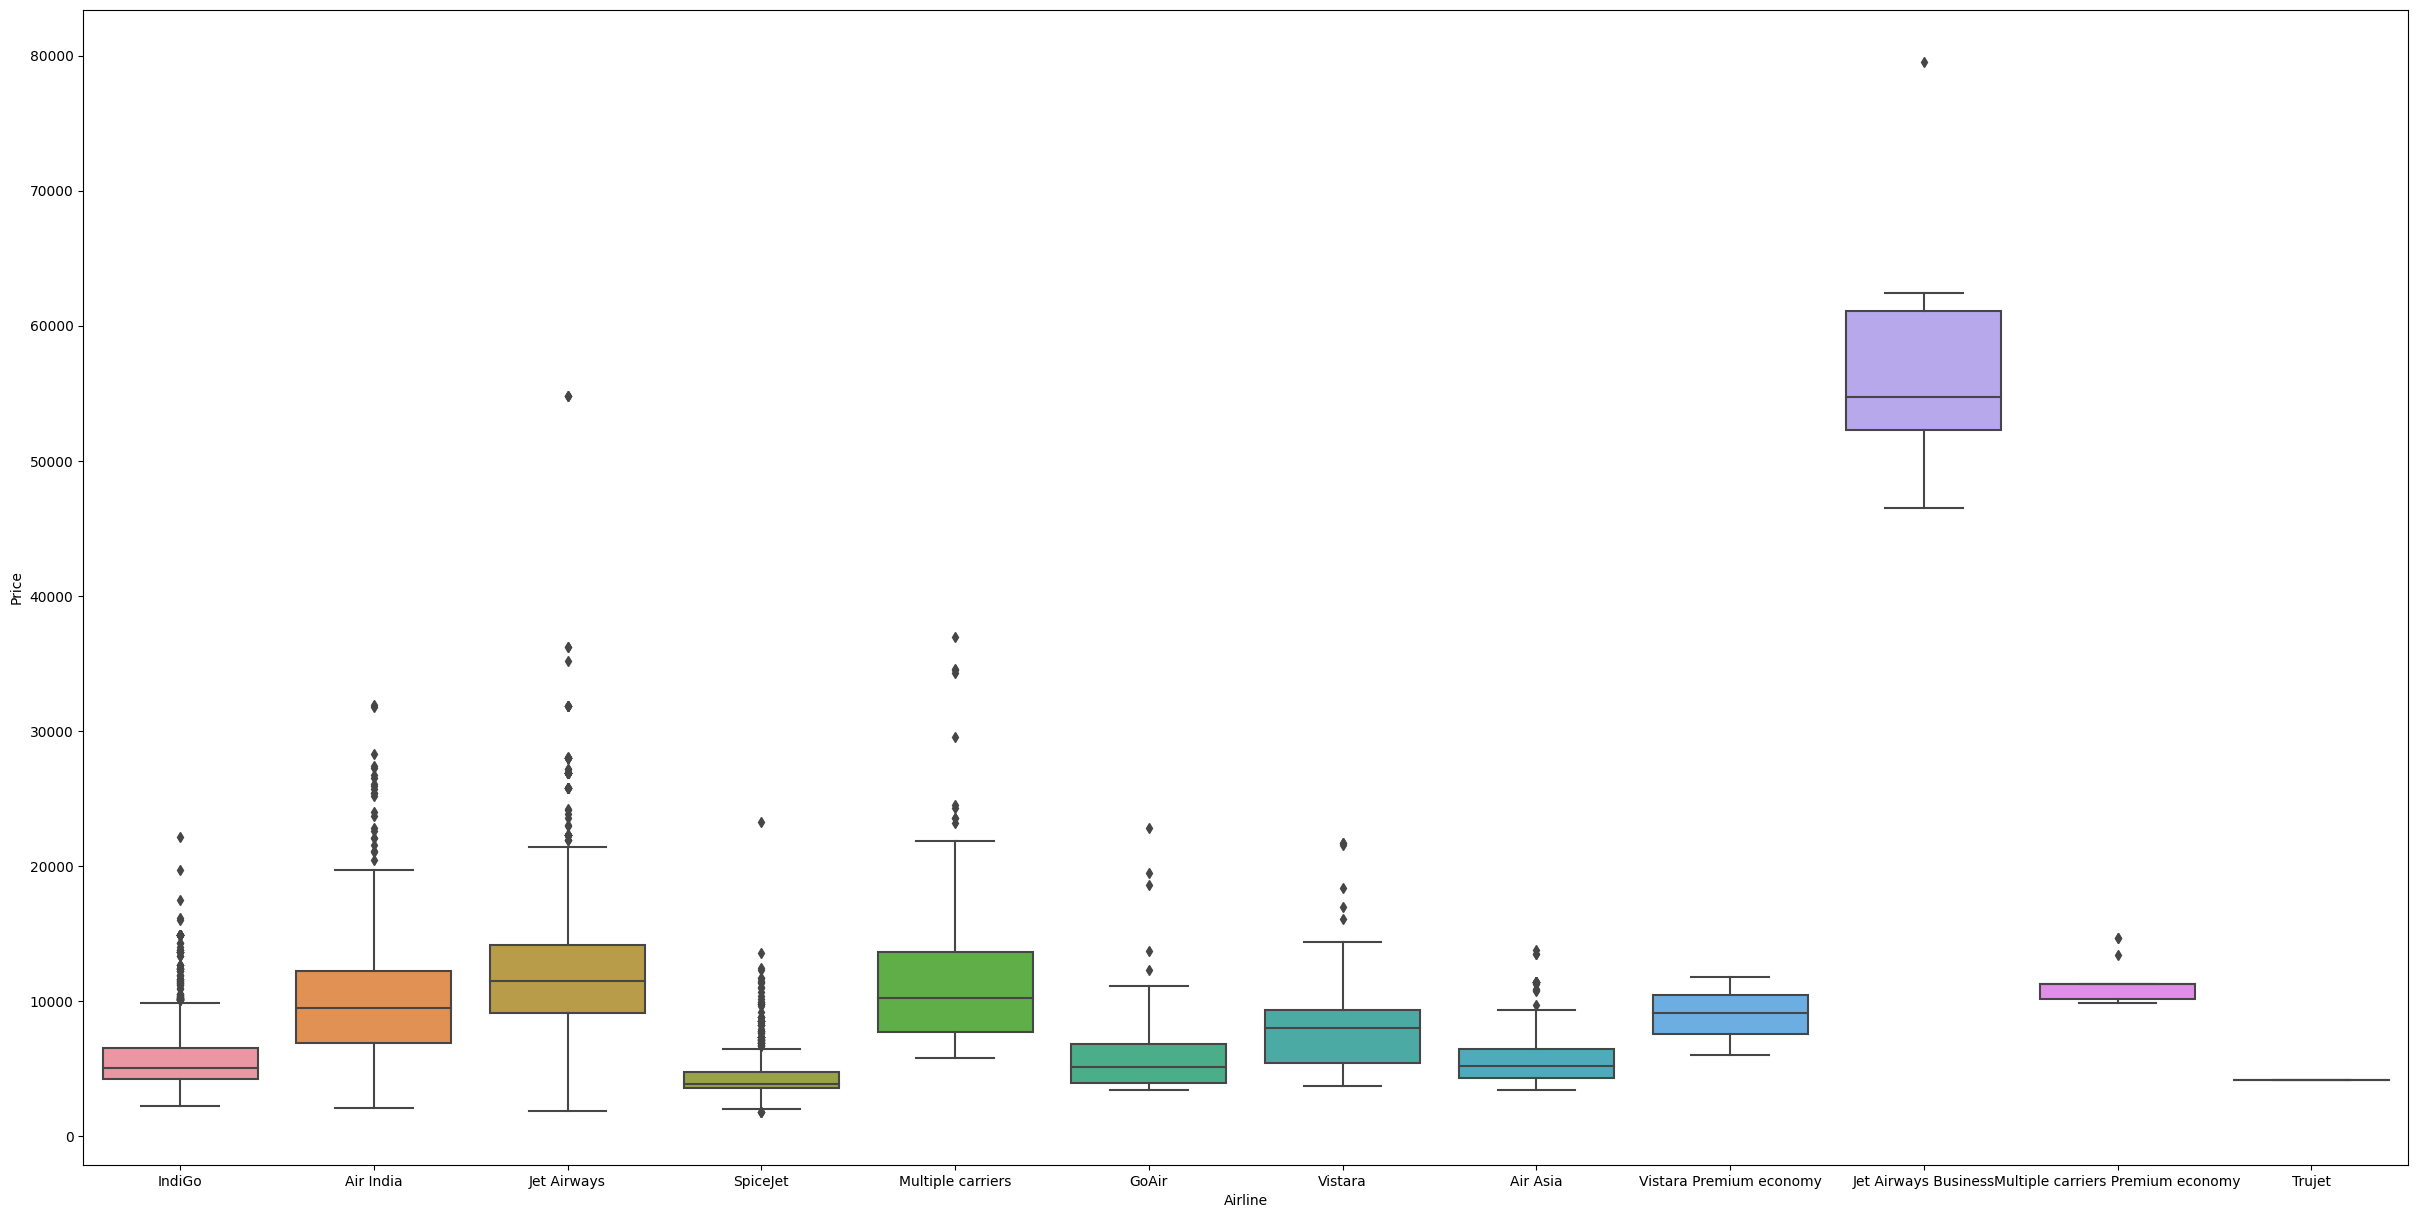

In [90]:
# Ans no4

# create the boxplot using seaborn
fig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(x=df['Airline'], y=df['Price'])



## Observation :



*  by creating the boxplot we can easily tell about min ,max, median of price of different airline 

* by the observation of the graph we find that the price of 'Jet Airbase' has the highest price 

* the 'trujet' airlin has the minimun price 





In [91]:
# Ans no5

import plotly.express as px
px.box(x=df['Airline'], y=df['Price'])

## Observation :



*  by creating the boxplot we can easily tell about min ,max, median of price of different airline 

* by the observation of the graph we find that the price of 'Jet Airbase business' has the highest price 

* the 'trujet' airlin has the minimun price 

* the ''Jet Airbase' has the huge amount of 'Outliers'
    * this will effect our output 
    * this will bise the result 

* Vistara primimum economy has no 'Outlier'




In [92]:
# Ans no6

df['day']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [93]:
df['Total_Stops_no']=df['Total_Stops'].str.split(' ').str[0].replace('non-stop','0').fillna(1).astype(int)


In [94]:
df['Total_Stops_no'].unique()

array([0, 2, 1, 3, 4])

In [96]:
df[df['Duration'].str.split(' ').str[0].str.split('h').str[0]=='5m']
# df.drop(6474,axis=0,inplace=True)
df['Duration-hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)


In [97]:
df['Destination-min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0].fillna(0).astype(int)

<Axes: xlabel='month', ylabel='Count'>

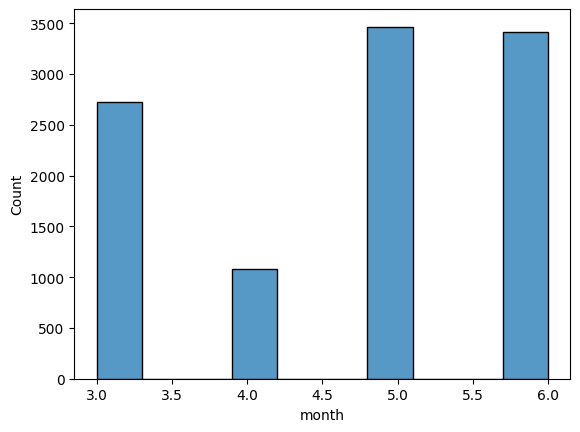

In [98]:
sns.histplot(data=df,x='month',bins=10)

## Observation:

* we have split he month from the date to find the peak season 

* after splitting the month we added it into our dataset 

* then we plot histogram which tells us about the frequency

* by the observation we find that the highest running flight are in month 5 and  month 6


In [99]:
# Ans no7
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Total_Stops_no,Duration-hour,Destination-min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,0,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,2,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,2,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,1,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,1,4,45


<Axes: xlabel='Airline', ylabel='Price'>

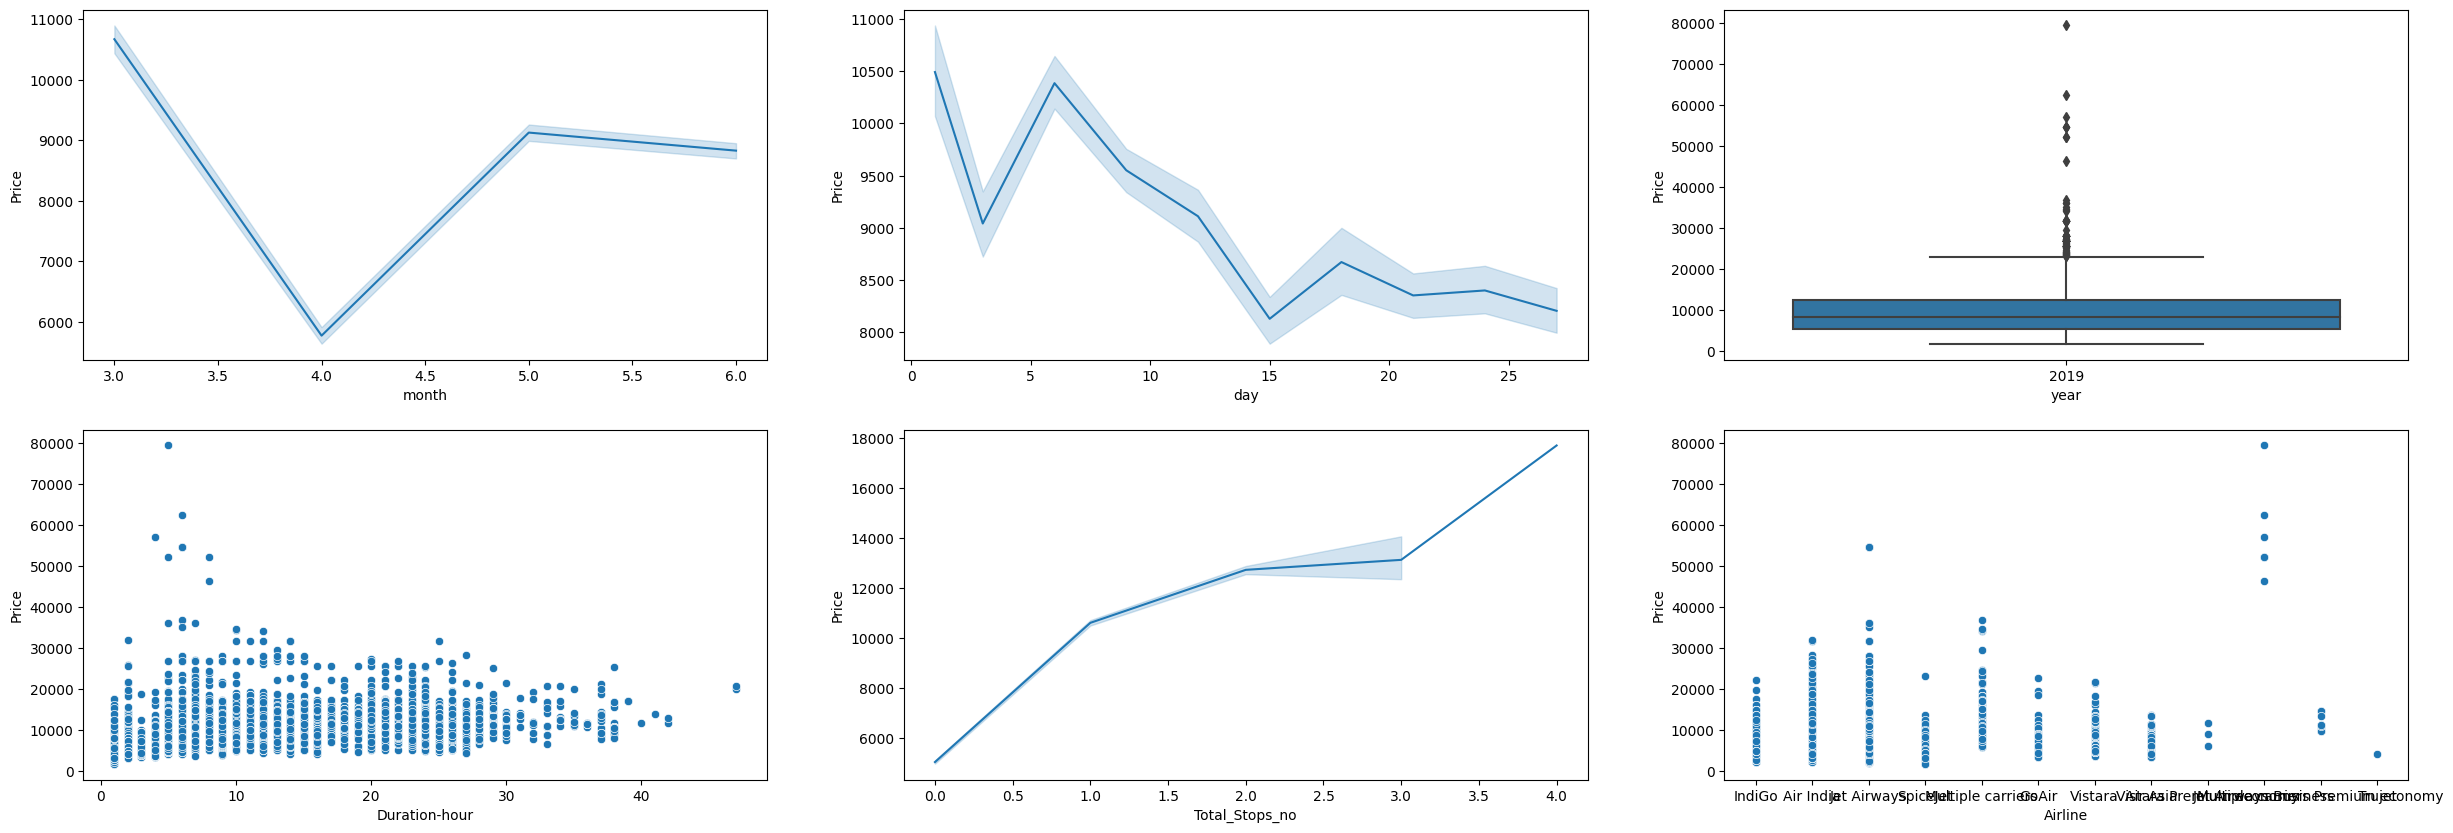

In [100]:
# Ans no7


import plotly.express as px
plt.subplots(2,3,figsize=(30,10))
plt.subplot(231)
sns.lineplot(df, y="Price",x='month')
plt.subplot(232)
sns.lineplot(df, y="Price",x='day')
plt.subplot(233)
sns.boxplot(df, y="Price",x='year')
plt.subplot(234)
sns.scatterplot(df, y="Price",x='Duration-hour')
plt.subplot(235)
sns.lineplot(df, y="Price",x='Total_Stops_no')
plt.subplot(236)
sns.scatterplot(df, y="Price",x='Airline')

## Observartion :

* there are four month (3,4,5,6)data of flights
   * first month(3rd month) is the highest price
   * 4rth month has the lowest price 
   * then increase in 5th month 

* the date is important feature of the dataset which effect on the price
    * the 1st date of the month has the highest price 
    * on date 3 decrease the prices and on 4 date price is increase 
    * after 4 th date the price af=re countiniously decreasing

* The flight data only the year 2019
   * the average price of the whole year is th almost 11000 
   * the minimum price of the whole year is  almost 7000 

* according to the duration hour the flight price is slightly increasing

* according to the stops is increasing the price is increasing

*  by creating the boxplot we can easily tell about min ,max, median of price of different airline 
  * by the observation of the graph we find that the price of 'Jet Airbase business' has the highest price 

   * the 'trujet' airlin has the minimun price 

    * the ''Jet Airbase' has the huge amount of 'Outliers'
       * this will effect our output 
       * this will bise the result 

   * Vistara primimum economy has no 'Outlier'
 

<Axes: xlabel='Airline', ylabel='Price'>

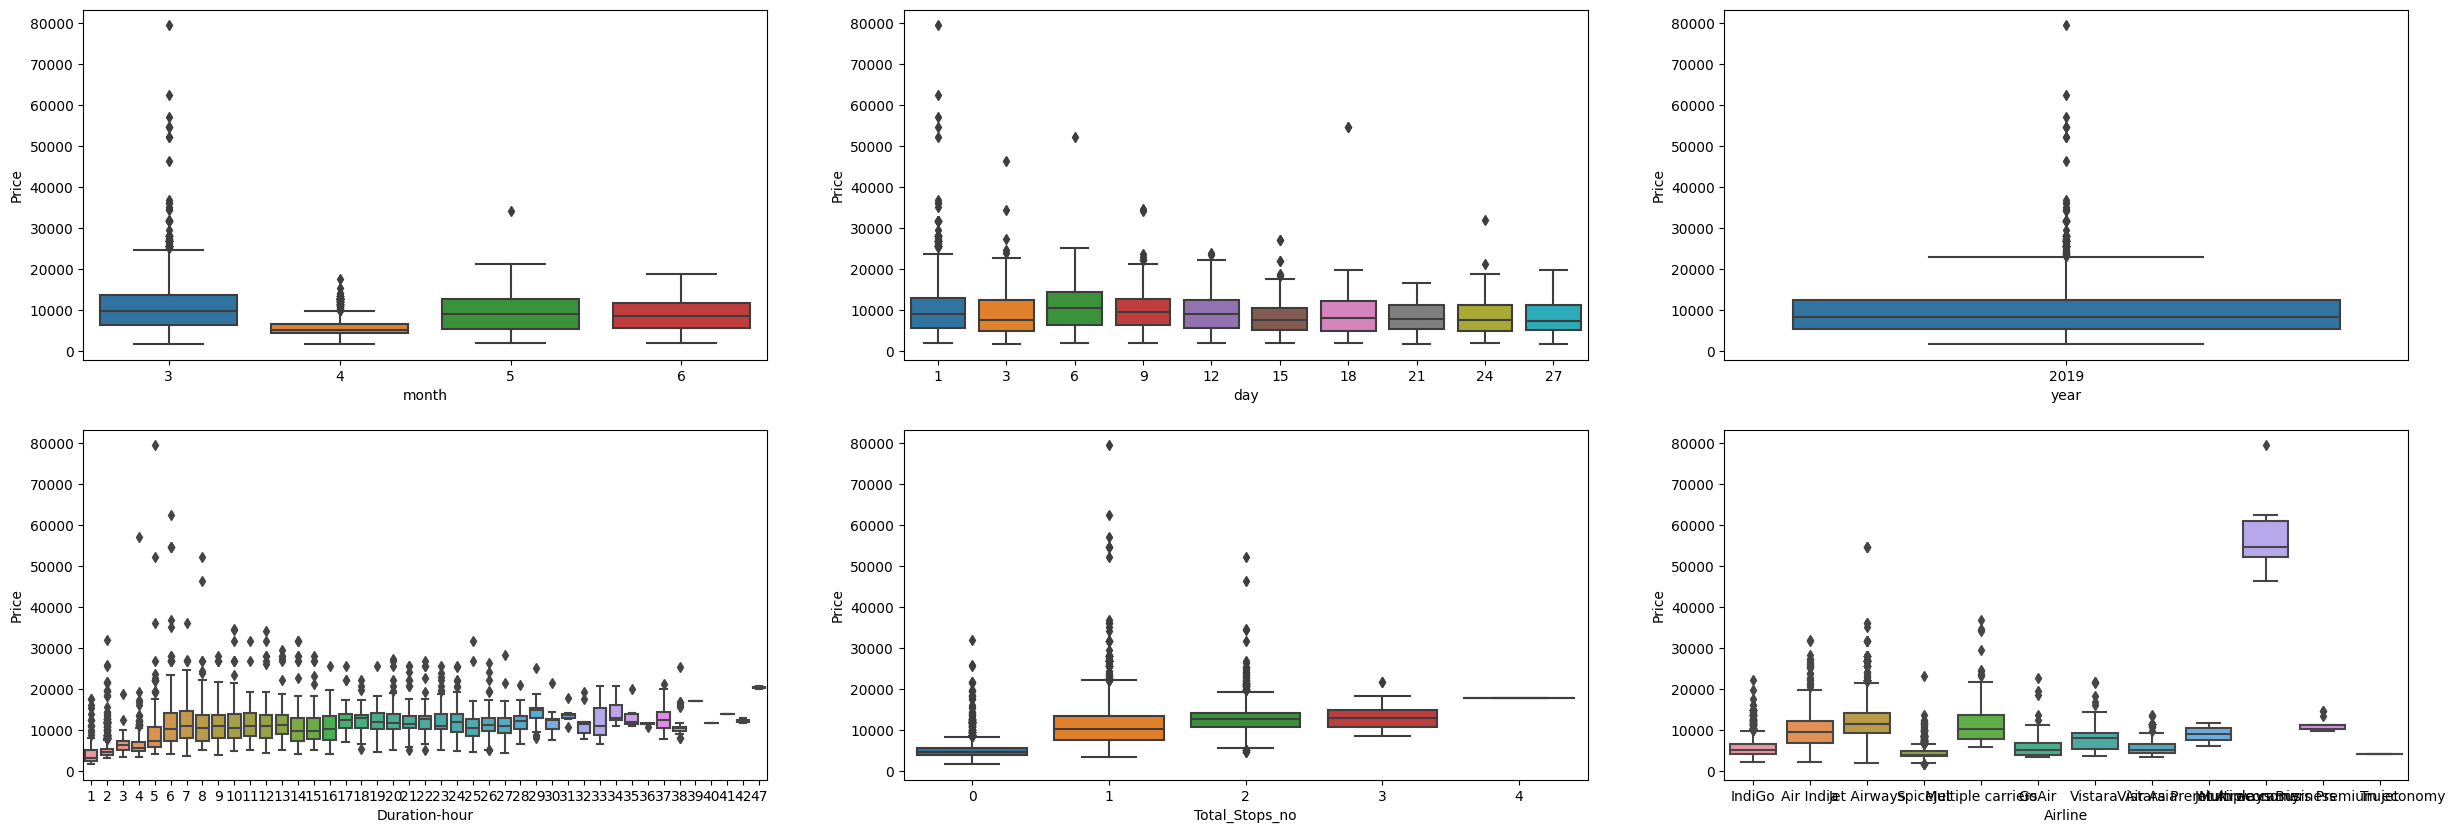

In [101]:

# ans no8


import plotly.express as px
plt.subplots(2,3,figsize=(30,10))
plt.subplot(231)
sns.boxplot(df, y="Price",x='month')
plt.subplot(232)
sns.boxplot(df, y="Price",x='day')
plt.subplot(233)
sns.boxplot(df, y="Price",x='year')
plt.subplot(234)
sns.boxplot(df, y="Price",x='Duration-hour')
plt.subplot(235)
sns.boxplot(df, y="Price",x='Total_Stops_no')
plt.subplot(236)
sns.boxplot(df, y="Price",x='Airline')


##Observation:


* the flights runs only in 4 monthes(3,4,5,6)
    * the maximum price paid in the month 3
    *  the minimum pricde paid for travelling in month 4
    * in month 3 there are are  many outlires
    * in month 5 only one outlier is present

* the flight runs only 10 dates(1,3,6,9,12,15,18,21,24,27)  
    *  the maximum flights runs on date 6
    * the most costly flights books on date 1
    * the date 1 has the highest number of 'Outliers'
    * date 21 and 27 has no 'Outlier'

* The flight data only the year 2019
   * the average price of the whole year is th almost 11000 
   * the minimum price of the whole year is  almost 7000

* the duration hour are 1to 47
  * the maximum amount paid for the 5 hour duration journey 
  * the minimum amount is paid for 1 hour journey
  * the 2 hour journey has the huge number of the 'Outliers'
  * the 39,40,42,47 hour time duration has no 'Outlier'

* the fights stops at 4 stops
    * the maximum price od the flight is with the 1 stopage
    * the maximun averave price is with stoppage 4
    * the flight with 1 stopage has highest no of outlier
    * the flight with 4 stopages has no 'Outlier'

*  by creating the boxplot we can easily tell about min ,max, median of price of different airline 
  * by the observation of the graph we find that the price of 'Jet Airbase business' has the highest price 

   * the 'trujet' airlin has the minimun price 

    * the ''Jet Airbase' has the huge amount of 'Outliers'
       * this will effect our output 
       * this will bise the result 

   * Vistara primimum economy has no 'Outlier'



In [102]:
df['Arrival_Time-hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype(int)

In [103]:
df['Arrival_Time-min'] =df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1].astype(int)


In [104]:
df['Route'].nunique()
#too many (128) route are so do not applying the OHE encoding we will apply lebal encoding

df['Destination'].nunique()
#here only 6 unique value we can easily apply 


df['Source'].nunique()
#here only 5 unique value we can easily apply OHE


df['Destination'].nunique()
#here only 6 unique value we can easily apply OHE


df['Additional_Info'].nunique()
#too many (128) route are so do not applying the OHE encoding we will apply lebal encoding


10

In [105]:
# Ans no9

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df_copy=df
df.shape

(10841, 13)

<Axes: xlabel='Category', ylabel='Rating'>

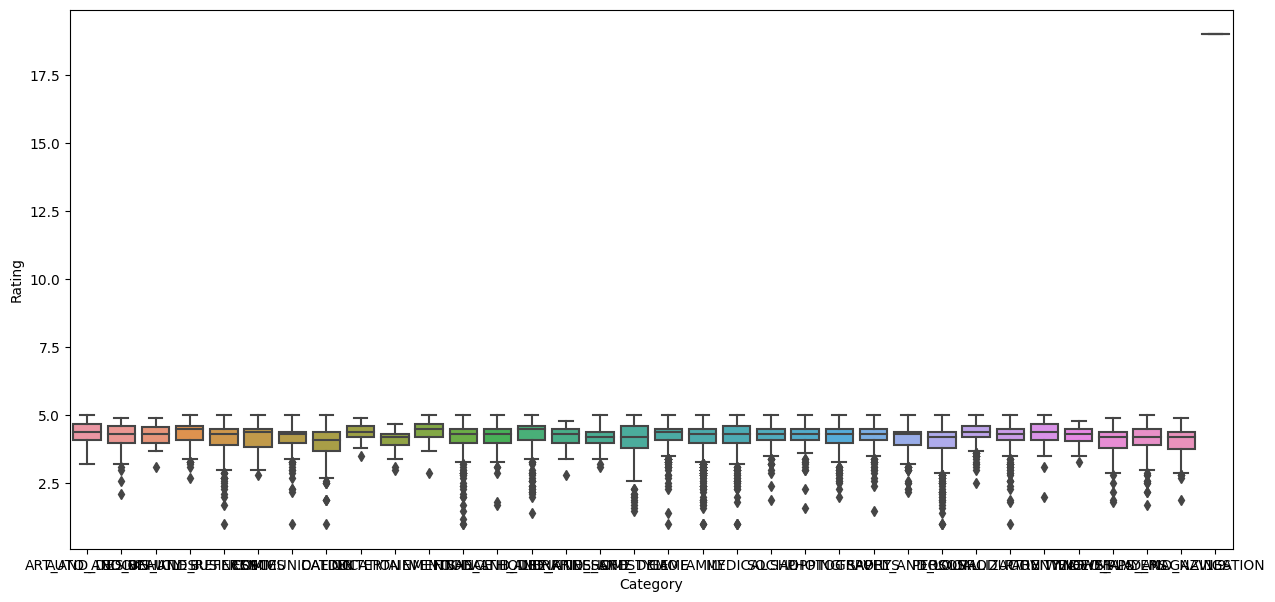

In [2]:
# Ans no10

plt.subplots(1,1,figsize=(15,7))
sns.boxplot(df, y="Rating",x='Category')


In [3]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Observation:

ART_AND_DESIGN--> the max ratinng is 5 
                  the median rating is 4.4
                  the min rating is the 3.2
                  it ha no  'Outlier'

'AUTO_AND_VEHICLES-->  the max ratinng is 4.9 
                  the median rating is 4.3
                  the min rating is the 2.1
                  it has 'Outlier'     

BEAUTY--> the max ratinng is 4.9 
                  the median rating is 4.3
                  the min rating is the 3.1
                  it has no 'Outlier' 

BOOKS_AND_REFERENCE--> the max ratinng is 4.9 
                  the median rating is 4.3
                  the min rating is the 3.5
                  it has 'Outlier' 

BUSINESS--> the max ratinng is 5
                  the median rating is 4.5
                  the min rating is the 3.0
                  it has 'Outlier' 

COMICS -->  the max ratinng is 4.9 
                  the median rating is 3.5
                  the min rating is the 3.0
                  it has 'Outlier' 

COMMUNICATION -->  the max ratinng is 4.9 
                  the median rating is 4.3
                  the min rating is the 2.1
                  it has 'Outlier'   

DATING--> the max ratinng is  5
                  the median rating is 4.1
                  the min rating is the 3
                  it has 'Outlier'       

HEALTH_AND_FITNESS --> the max ratinng is 4.9 
                  the median rating is 3.5
                  the min rating is the 2.1
                  it has 'Outlier' 

LIBRARIES_AND_DEMO --> the max ratinng is 4.9 
                  the median rating is 3.2
                  the min rating is the 2.1
                  it has 'Outlier' 

PHOTOGRAPHY--> the max ratinng is 5
                  the median rating is 4.3
                  the min rating is the 3.9
                  it has 'Outlier' 

PARENTING --> the max ratinng is 5
                  the median rating is 4.5
                  the min rating is the 3.7
                  it has 'Outlier'

MAPS_AND_NAVIGATION--> the max ratinng is 4.9
                  the median rating is 4.2
                  the min rating is the 2.8
                  it has  'Outlier'             

In [4]:
# Ans no11

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

* there are 1474 missing value in rating column
* the 1 missing vlaue in Type ,1 Missinng Value in content rating , 8 missing value in current Ver,3missing value in Android Ver

## the rating columns has many missing value so this column will disturb in analysing the dataset

In [5]:
# Ans no12
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [6]:
from pandas.core.internals.array_manager import NullArrayProxy
# Define function to convert size to numeric format
def convert_size(size):
    if 'k' in size:
        return float(size.replace('k', '')) / 1024
    elif 'M' in size:
        return float(size.replace('M', ''))
    else:
      return None

# Apply the conversion function to the Size column
df['size'] = df['Size'].apply(convert_size)



In [9]:
df['size'].fillna(df['size'].mean(),inplace=True)

In [7]:
mean=df['Rating'].mean()
df['Rating'].fillna(mean,inplace=True)

Text(0.5, 1.0, 'Rating vs Size')

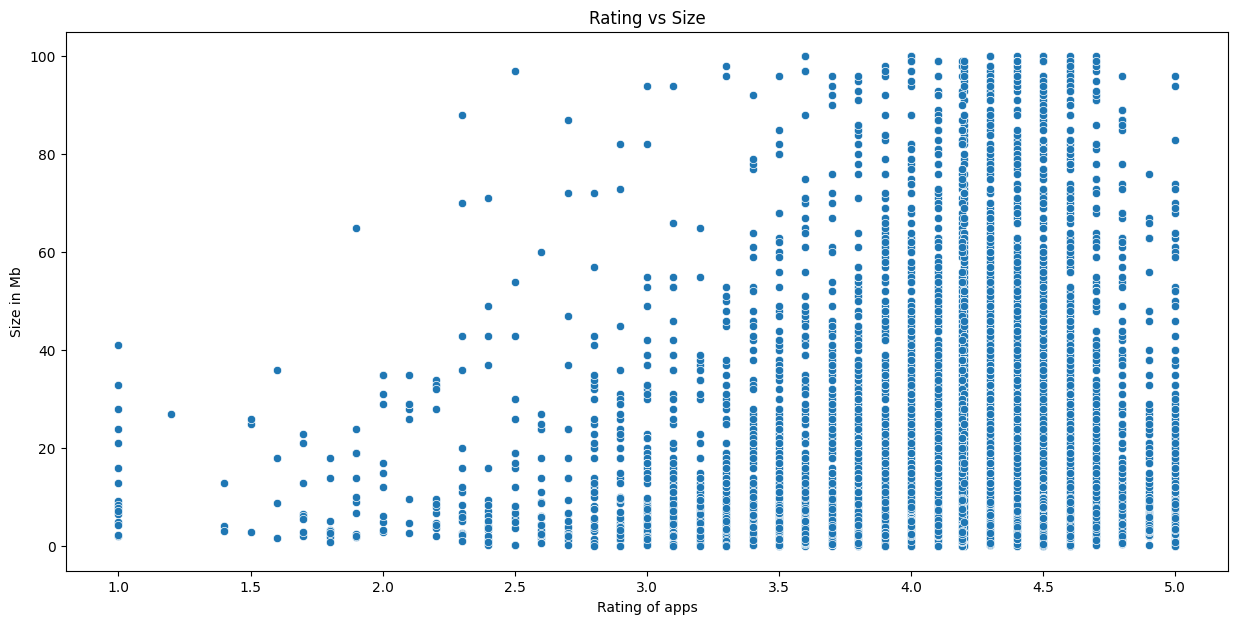

In [8]:

plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(df,x='Rating',y='size') 
plt.ylabel('Size in Mb')
plt.xlabel('Rating of apps')
plt.title('Rating vs Size')

Observation:

* here we defind the app size zero which size varies on device
* we can say there are many app which size varies on the devices
* there are mostly app has rating between 3.9 to 4.5
* the aap which have raing under 1.6 ,size of these app not greater then 40Mb


In [10]:
# Ans no13
df['price']=df_copy['Price'].str.replace('$','').str.replace('Everyone','0').astype(float)

<ipython-input-10-17c870f9afd0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df_copy['Price'].str.replace('$','').str.replace('Everyone','0').astype(float)


<Axes: xlabel='Type', ylabel='price'>

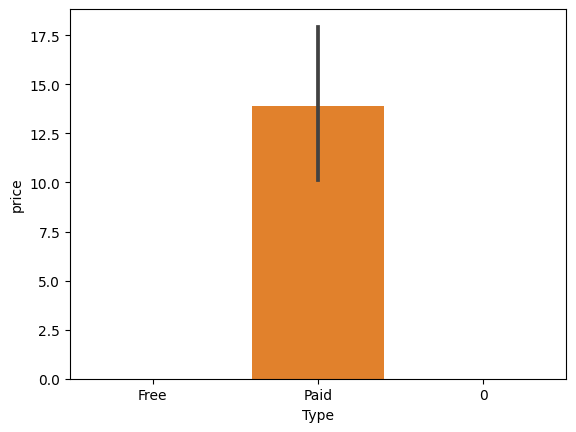

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

sns.barplot(df,x='Type',y='price')

In [48]:
# Ans no14
df['Installs']=df_copy['Installs']

df['Installs']=df['Installs'].replace('+','').replace(',','').replace('Free','0')

In [50]:
df_copy['Installs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
10841 non-null  int64
dtypes: int64(1)
memory usage: 84.8 KB


In [58]:
# Group the dataframe by app name and sum up the number of installs
installs_by_app = df.groupby('App')['Installs'].sum()

# Sort the series in descending order and select the top 10
top_10_apps_by_installs = installs_by_app.sort_values(ascending=False)[:10]

# Create a frequency table for the top 10 apps
freq_table = pd.DataFrame({'App': top_10_apps_by_installs.index, 'Installs': top_10_apps_by_installs.values})

# Print the frequency table
print(freq_table)


                                        App    Installs
0                            Subway Surfers  6000000000
1                             Google Photos  4000000000
2                                 Instagram  4000000000
3                                  Hangouts  4000000000
4                               Google News  4000000000
5                              Google Drive  4000000000
6                          Candy Crush Saga  3500000000
7  Messenger – Text and Video Chat for Free  3000000000
8                        WhatsApp Messenger  3000000000
9                                     Gmail  3000000000


In [85]:
# Ans no15
# Group the dataframe by category name and sum up the number of installs
installs_by_cat = df.groupby('Category')['Installs'].sum()

# Sort the series in descending order and select the top
top_cat_by_installs = installs_by_cat.sort_values(ascending=False)
top_cat_by_installs_ans = installs_by_cat.sort_values(ascending=False)[:1]
freq_table_cat = pd.DataFrame({'Category': top_cat_by_installs.index, 'Installs': top_cat_by_installs.values})
print(top_cat_by_installs_ans.index)

Index(['GAME'], dtype='object', name='Category')


## Observation ▶

* now we can say the GAme category is most installable category 

<Axes: xlabel='Category', ylabel='Installs'>

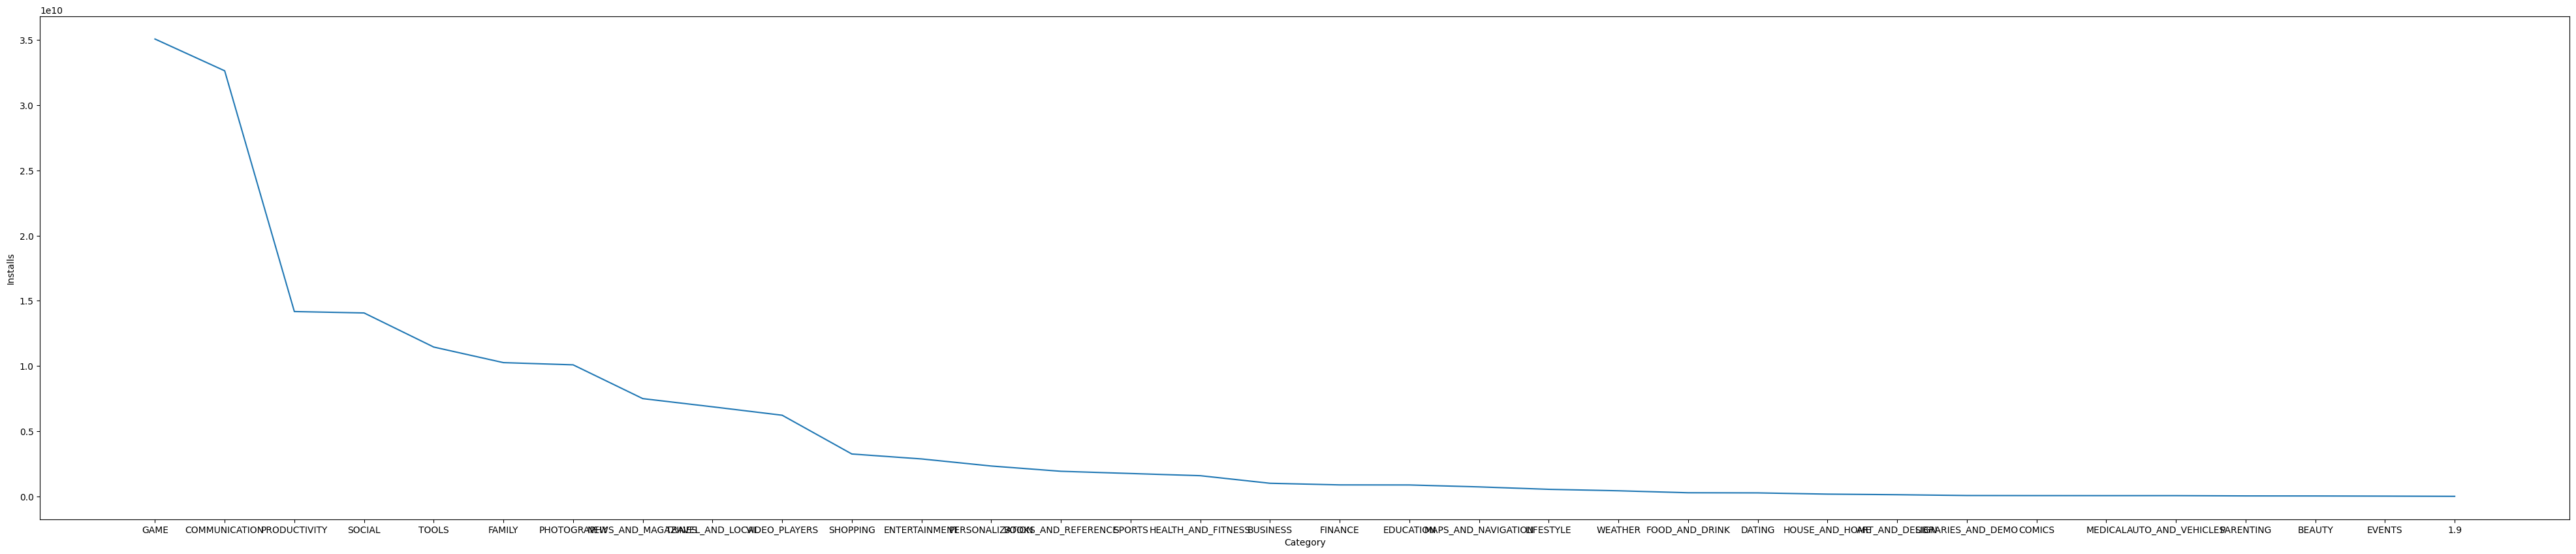

In [84]:
# Ans no16
plt.subplots(1,1,figsize=(50,10))
sns.lineplot(freq_table_cat,x='Category',y='Installs')

## Ans no16

according to installs the most successfull developer are of the GAME category 
the successfulldevelopers are who those developed the  Subway Surfers which is installed by   6000000000.

In [81]:
# Ans no17
df['month']=df['Last Updated'].str.split(',').str[0].str.split(' ').str[0]

<Axes: xlabel='month', ylabel='Count'>

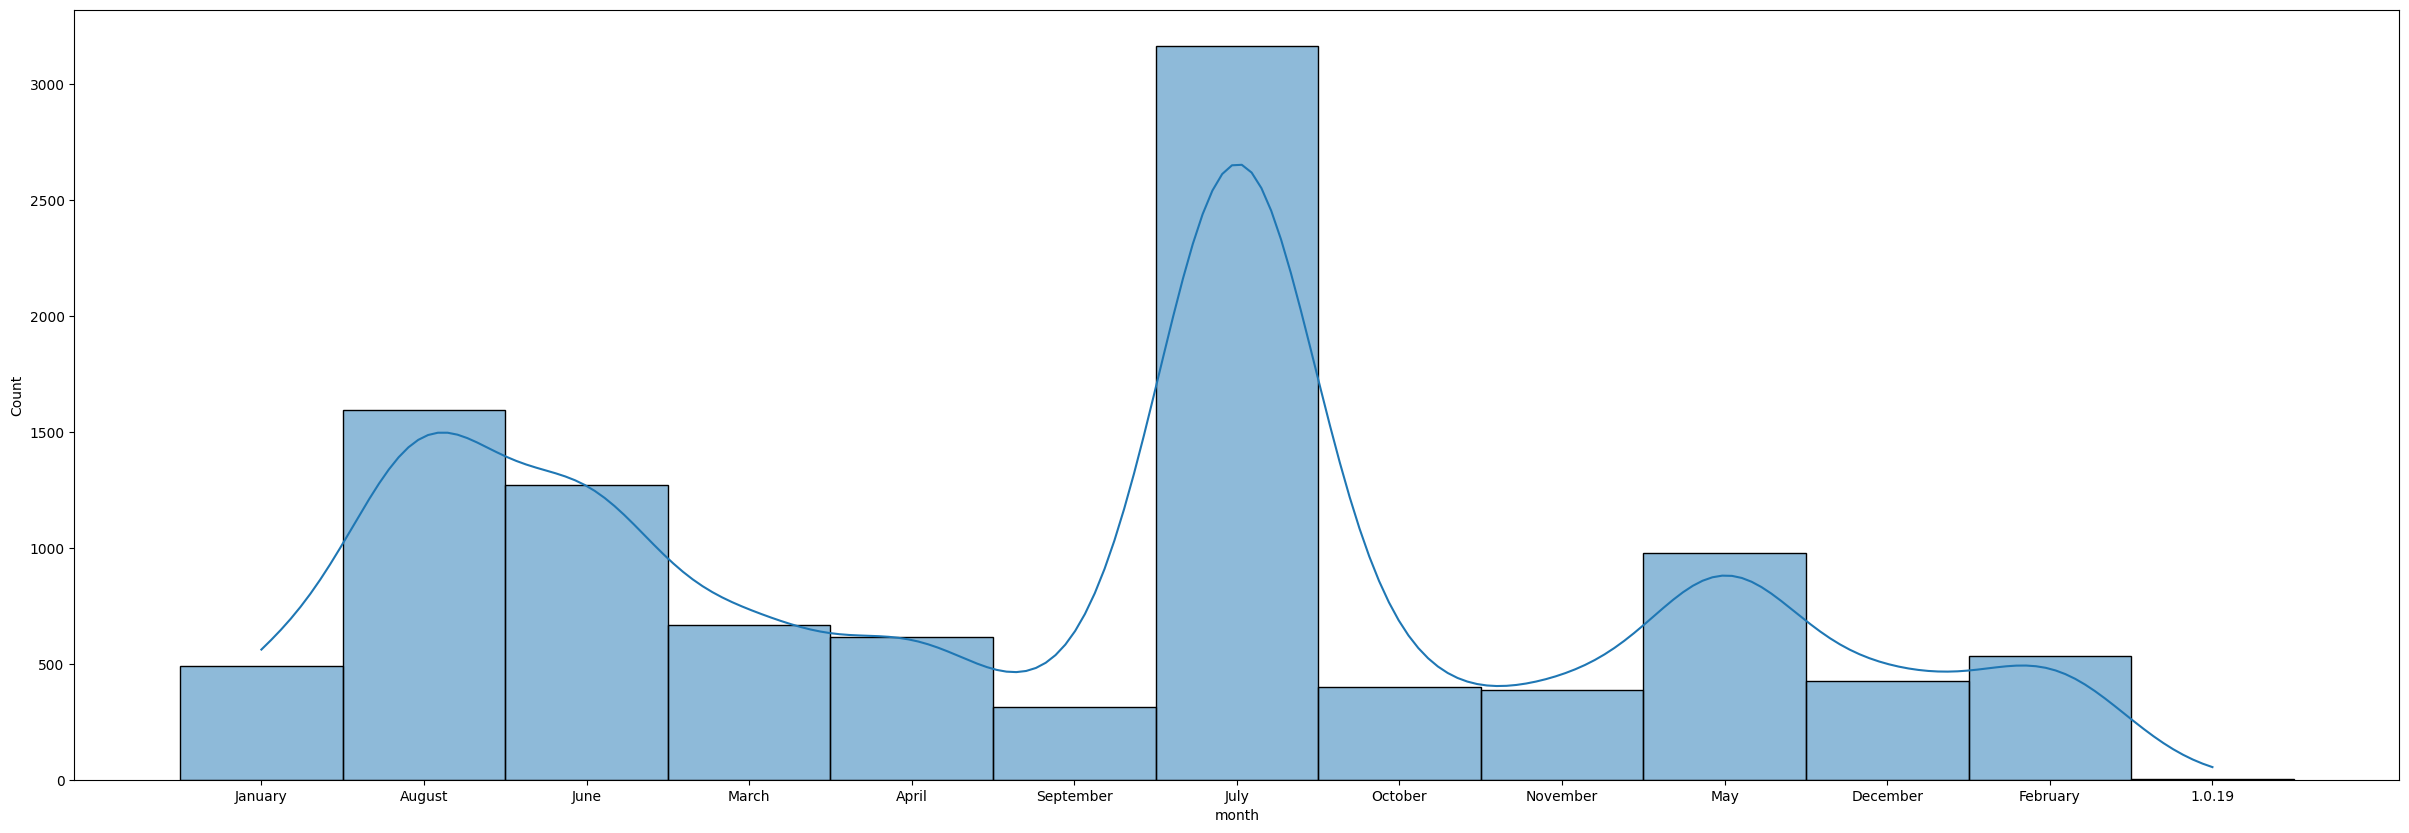

In [83]:
plt.subplots(1,1,figsize=(30,10))
sns.histplot(df,x='month',kde=True)

# Observation:

* by the visualization we can say the best time to launch the app is july month .

* We analyse the 'last update date' to analyse the best time to launch the new app.

* the app of game category shuld be successfull to launch in  july month

